In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator

In [19]:
path = "/home/riccardo/Desktop/PhD/MyRepos/FD-PyIMEX-RB/__RESULTS/AdvDiff2D/NvsNh3"
results = np.load(os.path.join(path, "results.npz"), allow_pickle=True)

In [20]:
# Nt_FE = results['Nt_FE'][None][0][0]

Ns = results['N_values'][None][0]
Nhs = results['Nh_values'][None][0]

epsilon_values = results['epsilon_values'][None][0]
Nt_values = results['Nt_values'][None][0]

errIMEX = results['errors_l2'][None][0]['IMEX-RB']
errBE = results['errors_l2'][None][0]['BE']

timesIMEX = results['times'][None][0]['IMEX-RB']
timesBE = results['times'][None][0]['BE']

subiters = results['subiters'][None][0]['IMEX-RB']

In [23]:
epsilon_values

array([0.001, 0.001, 0.001, 0.001, 0.001])

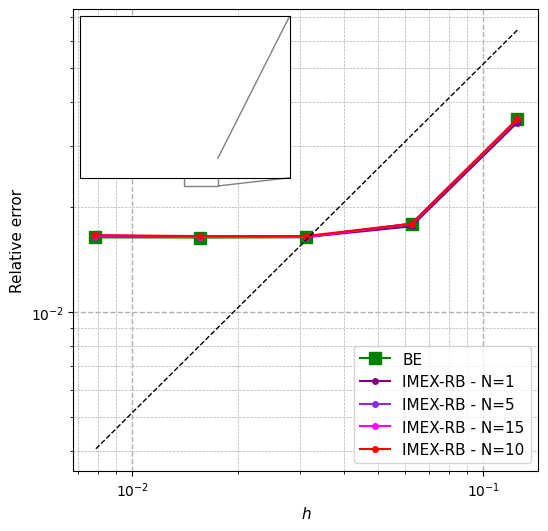

In [22]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

fig, ax = plt.subplots(figsize=(6,6))

ax.loglog(2 / (Nhs-1), errBE, '-s', markersize=8, color="green", label="BE")

ax.loglog(2 / (Nhs-1), errIMEX[:, 0], '-o', markersize=4, color="purple", 
           label=f"IMEX-RB - N={Ns[0]}")
ax.loglog(2 / (Nhs-1), errIMEX[:, 1], '-o', markersize=4, color="blueviolet", 
           label=f"IMEX-RB - N={Ns[1]}")
ax.loglog(2 / (Nhs-1), errIMEX[:, 3], '-o', markersize=4, color="magenta", 
           label=f"IMEX-RB - N={Ns[3]}")
ax.loglog(2 / (Nhs-1), errIMEX[:, 2], '-o', markersize=4, color="red", 
           label=f"IMEX-RB - N={Ns[2]}")
#ax.loglog(2 / Nhs, errIMEX[:, 4], '-o', markersize=4, color="hotpink", 
#           label=f"IMEX-RB - N={Ns[4]}")

ax.loglog(2 / (Nhs-1), (2 * (Nhs[0] - 1) * errBE[0] * 0.9) / (Nhs-1), 
          color="k", linestyle='--', linewidth=1)

# Create an inset axis inside the main axis
axins = inset_axes(ax, width="45%", height="35%", loc='upper left')

axins.loglog(2 / (Nhs-1), errBE, '-s', markersize=8, color="green", label="BE")

axins.loglog(2 / (Nhs-1), errIMEX[:, 0], '-o', markersize=4, color="purple", 
             label=f"IMEX-RB - N={Ns[0]}")
axins.loglog(2 / (Nhs-1), errIMEX[:, 1], '-o', markersize=4, color="blueviolet", 
             label=f"IMEX-RB - N={Ns[1]}")
axins.loglog(2 / (Nhs-1), errIMEX[:, 3], '-o', markersize=4, color="magenta", 
             label=f"IMEX-RB - N={Ns[3]}")
axins.loglog(2 / (Nhs-1), errIMEX[:, 2], '-o', markersize=4, color="red", 
             label=f"IMEX-RB - N={Ns[2]}")
#axins.loglog(2 / (Nhs-1), errIMEX[:, 4], '-o', markersize=4, color="hotpink", 
#             label=f"IMEX-RB - N={Ns[4]}")

# Set the zoomed-in region limits
axins.set_xlim(1.4e-2, 1.75e-2)
axins.set_ylim(2.3e-2, 2.75e-2)

# Optional: remove tick labels for inset
# Turn off ticks and numbers cleanly
axins.tick_params(
    axis='both',        # both axes
    which='both',       # both major and minor ticks
    bottom=False,       # no bottom ticks
    top=False,          # no top ticks
    left=False,         # no left ticks
    right=False,        # no right ticks
    labelbottom=False,  # no x-axis labels
    labelleft=False     # no y-axis labels
)

# Draw lines connecting the inset region to the main plot
mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.5")

ax.grid(which="major", linewidth=1, linestyle='--')
ax.grid(which="minor", linewidth=0.5, linestyle='--')
ax.legend(fontsize=11, loc="lower right")

ax.set_xlabel(r"$h$", fontsize=11)
ax.set_ylabel("Relative error", fontsize=11)

plt.show()

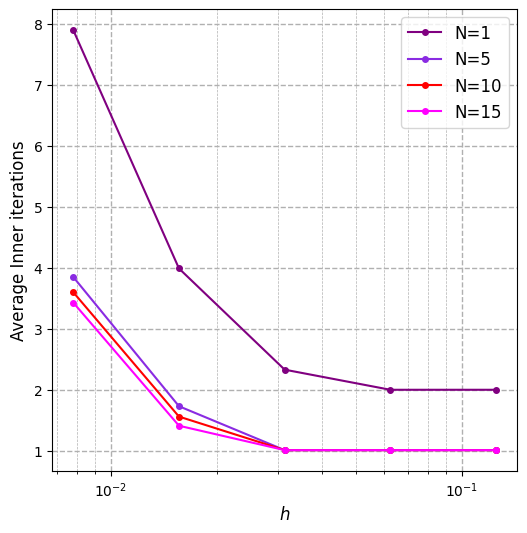

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
ax.semilogx(2 / (Nhs-1), np.mean(subiters[:, 0] + 1, axis=-1), '-o', markersize=4, color="purple", 
           label=f"N={Ns[0]}")
ax.semilogx(2 / (Nhs-1), np.mean(subiters[:, 1] + 1, axis=-1), '-o', markersize=4, color="blueviolet", 
           label=f"N={Ns[1]}")
ax.semilogx(2 / (Nhs-1), np.mean(subiters[:, 2] + 1, axis=-1), '-o', markersize=4, color="red", 
           label=f"N={Ns[2]}")
ax.semilogx(2 / (Nhs-1), np.mean(subiters[:, 3] + 1, axis=-1), '-o', markersize=4, color="magenta", 
           label=f"N={Ns[3]}")
#ax.semilogx(2 / (Nhs-1), np.mean(subiters[:, 4] + 1, axis=-1), '-o', markersize=4, color="hotpink", 
#           label=f"N={Ns[4]}")

ax.legend(fontsize=12)
ax.grid(which="major", linestyle='--', linewidth=1)
ax.grid(axis="x", which="minor", linestyle='--', linewidth=.5)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel(r"$h$", fontsize=12)
ax.set_ylabel("Average Inner iterations", fontsize=12)

plt.show()

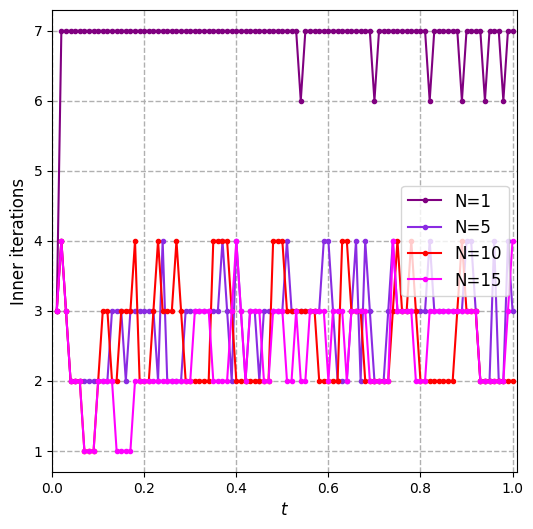

In [9]:
Nh_idx = -1
tvec = np.linspace(0, 1, 101)[1:]

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(tvec, subiters[Nh_idx, 0], '-o', markersize=3, color="purple", 
           label=f"N={Ns[0]}")
ax.plot(tvec, subiters[Nh_idx, 1], '-o', markersize=3, color="blueviolet", 
           label=f"N={Ns[1]}")
ax.plot(tvec, subiters[Nh_idx, 2], '-o', markersize=3, color="red", 
           label=f"N={Ns[2]}")
ax.plot(tvec, subiters[Nh_idx, 3,], '-o', markersize=3, color="magenta", 
           label=f"N={Ns[3]}")
#ax.plot(tvec, subiters[Nh_idx, 4], '-o', markersize=3, color="hotpink", 
#           label=f"N={Ns[4]}")

ax.legend(fontsize=12)
ax.grid(which="major", linestyle='--', linewidth=1)

ax.set_xlim([0, 1.01])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel(r"$t$", fontsize=12)
ax.set_ylabel("Inner iterations", fontsize=12)

plt.show()

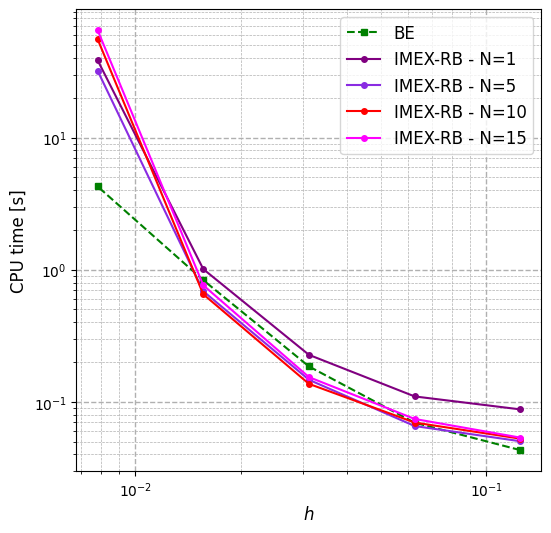

In [24]:
fig, ax = plt.subplots(figsize=(6,6))
ax.loglog(2 / (Nhs-1), timesBE, '--s', markersize=4, color="green", 
           label="BE")

ax.loglog(2 / (Nhs-1), timesIMEX[:, 0], '-o', markersize=4, color="purple", 
           label=f"IMEX-RB - N={Ns[0]}")
ax.loglog(2 / (Nhs-1), timesIMEX[:, 1], '-o', markersize=4, color="blueviolet", 
           label=f"IMEX-RB - N={Ns[1]}")
ax.loglog(2 / (Nhs-1), timesIMEX[:, 2], '-o', markersize=4, color="red", 
           label=f"IMEX-RB - N={Ns[2]}")
ax.loglog(2 / (Nhs-1), timesIMEX[:, 3], '-o', markersize=4, color="magenta", 
           label=f"IMEX-RB - N={Ns[3]}")
#ax.loglog(2 / (Nhs-1), timesIMEX[:, 4], '-o', markersize=4, color="hotpink", 
#           label=f"IMEX-RB - N={Ns[4]}")

"""
# Create an inset axis inside the main axis
axins = inset_axes(ax, width="40%", height="35%", loc='lower left')
axins.loglog(1 / Nts, timesIMEX[:, 0], '-o', markersize=4, color="purple", 
           label=r"IMEX-RB - $\varepsilon = 100 \ \bar{\varepsilon}$")
axins.loglog(1 / Nts, timesIMEX[:, 1], '-o', markersize=4, color="darkred", 
           label=r"IMEX-RB - $\varepsilon = 10 \ \bar{\varepsilon}$")
axins.loglog(1 / Nts, timesIMEX[:, 2], '-o', markersize=4, color="red", 
           label=r"IMEX-RB - $\varepsilon = 5 \ \bar{\varepsilon}$")
axins.loglog(1 / Nts, timesIMEX[:, 3], '-o', markersize=4, color="lightcoral", 
           label=r"IMEX-RB - $\varepsilon = \bar{\varepsilon}$")
axins.axvline(1 / Nt_FE, color="tab:green", linestyle='-.') 

# Set the zoomed-in region limits
axins.set_xlim(3.6e-3, 1.2e-2)
axins.set_ylim(0.35, 1)

# Optional: remove tick labels for inset
# Turn off ticks and numbers cleanly
axins.tick_params(
    axis='both',        # both axes
    which='both',       # both major and minor ticks
    bottom=False,       # no bottom ticks
    top=False,          # no top ticks
    left=False,         # no left ticks
    right=False,        # no right ticks
    labelbottom=False,  # no x-axis labels
    labelleft=False     # no y-axis labels
)

# Draw lines connecting the inset region to the main plot
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
"""

ax.legend(fontsize=12)
ax.grid(which="major", linestyle='--', linewidth=1)
ax.grid(which="minor", linestyle='--', linewidth=.5)

ax.set_xlabel(r"$h$", fontsize=12)
ax.set_ylabel("CPU time [s]", fontsize=12)

plt.show()